Basic code which shows what it's like to run PPO on the Pistonball env using the parallel API, this code is inspired by CleanRL.

This code is exceedingly basic, with no logging or weights saving.
The intention was for users to have a (relatively clean) ~200 line file to refer to when they want to design their own learning algorithm.

Author: Jet (https://github.com/jjshoots)


Modified by Anthony Goeckner for the patrolling zoo environment.

In [1]:
%load_ext autoreload
%autoreload 2

import torch
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from algorithm.ppo import PPO

# set process priority low
import psutil
import os
if os.name == 'nt':
    psutil.Process(os.getpid()).nice(psutil.BELOW_NORMAL_PRIORITY_CLASS)
else:
    psutil.Process(os.getpid()).nice(10)

# Configuration

In [2]:
MAX_CYCLES = 50

""" ENV SETUP """
patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 3,
    require_explicit_visit=False,
    max_steps=MAX_CYCLES,
    reward_shift = 0.3
)

"""ALGO PARAMS"""
algo = PPO(
    env = env,
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    ent_coef = 0.1,
    vf_coef = 0.1,
    clip_coef = 0.1,
    gamma = 0.99,
    batch_size = 1,
    stack_size = 4,
    frame_size = (64, 64),
    max_cycles = MAX_CYCLES,
    total_episodes = 1
)

c:\Users\Anthony\miniconda3\envs\patrolling_zoo\lib\site-packages\gymnasium\spaces\box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


# Training

In [3]:
algo.train()

Training episode 0
Episodic Return: 870.0004272460938
Episode Length: 49

Value Loss: 2.308027982711792
Policy Loss: 0.8383235335350037
Old Approx KL: 0.3084986209869385
Approx KL: 0.04304760694503784
Clip Fraction: 0.6780045351473923
Explained Variance: -0.0006390810012817383
Training episode 0
Episodic Return: 870.0004272460938
Episode Length: 49



# Evaluation

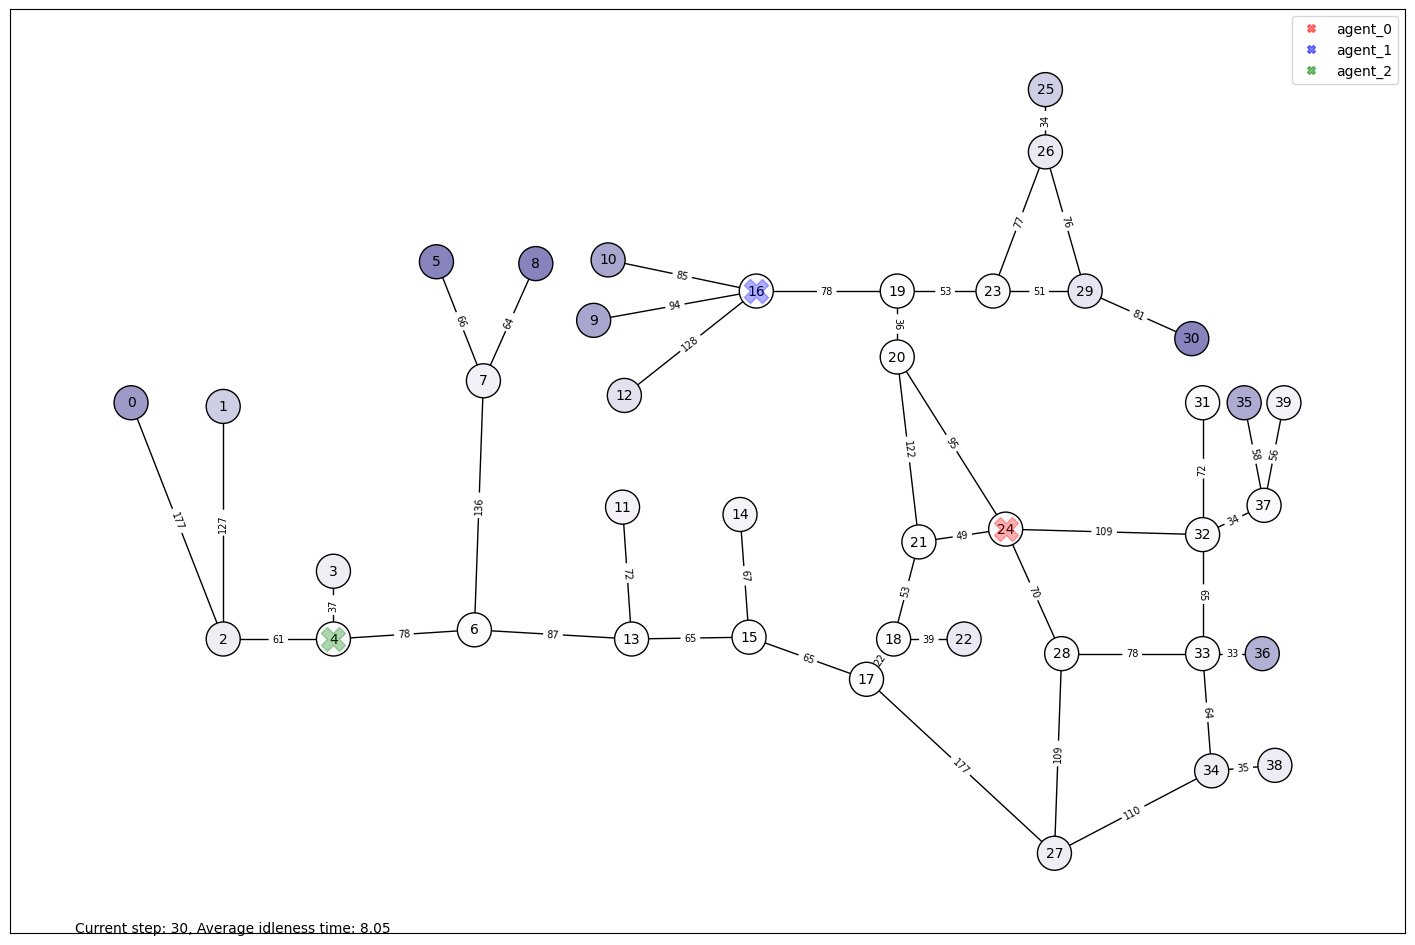

In [4]:
algo.evaluate()